In [5]:
import os
import optuna
import numpy as np
import pandas as pd
import warnings
from two_class_nested_cv_plus_auc import NestedCVOptimizer

warnings.filterwarnings('ignore')

In [6]:
def nested_cv(X, y, groups, exp_name):
    """
    Run nested cross-validation with comprehensive results.
    Returns a DataFrame with all metrics, fold results, and summary statistics.
    """
    # Initialize and run optimizer
    optimizer = NestedCVOptimizer(
        X=X,
        y=y,
        groups=groups,
        positive_class="void",
        n_outer_folds=5,
        n_inner_folds=3,
        n_trials=50,
        random_state=42
    )
    
    print("\nRunning nested cross-validation...")
    summaries = optimizer.run_nested_cv()

    print(f"\n📊 RESULTS SUMMARY:")
    if 'best_model' in summaries:
        print(f"Best performing model: {summaries['best_model'].upper()}")
        print(f"Best accuracy: {summaries['best_accuracy']:.4f}")
    else:
        print("Error: Could not determine best model due to processing issues")

    # Display summary
    # print(f"\n📊 RESULTS SUMMARY:")
    # print(f"Best performing model: {summaries['best_model'].upper()}")
    # print(f"Best F1 (positive): {summaries['best_f1_positive']:.4f}")
    # print(f"Best accuracy: {summaries['best_accuracy']:.4f}")

    results = optimizer.get_results_dataframe()

    optimizer.plot_roc_curves(save_path=f'/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/subject_based_norm_nested_cv/two_class/preprocessed/feature_set_2/nested_cv/none/with_gravity/plots/roc_curves/{exp_name}_roc_curves.png')
    optimizer.plot_auc_comparison(save_path=f'/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/subject_based_norm_nested_cv/two_class/preprocessed/feature_set_2/nested_cv/none/with_gravity/plots/auc_comparison/{exp_name}_auc_comparison.png')
    
    return results

In [7]:
files = [
    'two_class_pp_1s_0.5.csv',
    'two_class_pp_3s_no.csv',
    'two_class_pp_5s_0.5.csv',
]

base_path = '/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/feature_datasets/subject_based_norm/preprocessed/feature_set_2/with_gravity'

1. Loop through all files
2. Perform nested cross validation on each file
3. Store result in this format

![Output format](/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/output_format.png)


[I 2025-09-07 11:47:06,854] A new study created in memory with name: no-name-e382890f-0310-4df1-80af-797339bd55d6


Nested cross-validation for 1s_0.5
Positive class 'void' is encoded as: 1
Label mapping: {'non-void': np.int64(0), 'void': np.int64(1)}

Running nested cross-validation...
Starting Binary Nested Cross-Validation with separate optimization for each model...
Positive class: 'void' (encoded as 1)

OUTER FOLD 1/5
Train size: 4224, Test size: 558
Class distribution in test set: {'non-void': np.int64(266), 'void': np.int64(292)}

--- Optimizing RF ---


[I 2025-09-07 11:47:09,023] Trial 0 finished with value: 0.5373437194577159 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5373437194577159.
[I 2025-09-07 11:47:11,439] Trial 1 finished with value: 0.570916501201911 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.570916501201911.
[I 2025-09-07 11:47:31,498] Trial 2 finished with value: 0.551572276470201 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.570916501201911.
[I 2025-09-07 11:47:57,920] Trial 3 finished with value: 0.5423891162916767 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 

Best rf params: {'n_estimators': 110, 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}
Best rf F1 score (positive class): 0.5839


[I 2025-09-07 11:52:44,248] A new study created in memory with name: no-name-c169a00b-afe1-4817-859a-01d468830037


rf test accuracy: 0.6398
rf test F1 (positive): 0.6036
rf test AUC: 0.7282

--- Optimizing XGB ---


[I 2025-09-07 11:52:50,742] Trial 0 finished with value: 0.5307856236256474 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5307856236256474.
[I 2025-09-07 11:52:54,988] Trial 1 finished with value: 0.5173850705917309 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5307856236256474.
[I 2025-09-07 11:52:58,701] Trial 2 finished with value: 0.5188445924394273 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 87, 'max_depth': 3, 'learning_rate': 0.03149733449941491, 'subsample': 0.8570552384294298, 'colsample_bytree': 0.7090156595897537, 'min_child_weight': 4, 'gamma': 4.686462164284994, 'reg_alpha': 1.3330098976000608, 'reg_lambda': 0.6202965191549846}
Best xgb F1 score (positive class): 0.5741


[I 2025-09-07 11:55:53,945] A new study created in memory with name: no-name-a1d9771b-9713-49fe-a661-6ded350c0339
[I 2025-09-07 11:55:54,031] Trial 0 finished with value: 0.4478785430446813 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.4478785430446813.


xgb test accuracy: 0.6649
xgb test F1 (positive): 0.6326
xgb test AUC: 0.7464

--- Optimizing DT ---


[I 2025-09-07 11:55:55,361] Trial 1 finished with value: 0.4998798023408144 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.4998798023408144.
[I 2025-09-07 11:55:55,444] Trial 2 finished with value: 0.5508450658972749 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5508450658972749.
[I 2025-09-07 11:55:55,490] Trial 3 finished with value: 0.3802970102536178 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5508450658972749.
[I 2025-09-07 11:55:55,529] Trial 4 finished with value: 0.36221677793950646 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max

Best dt params: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'splitter': 'random'}
Best dt F1 score (positive class): 0.6175
dt test accuracy: 0.6434
dt test F1 (positive): 0.6527
dt test AUC: 0.6792

OUTER FOLD 2/5
Train size: 3776, Test size: 1006
Class distribution in test set: {'non-void': np.int64(560), 'void': np.int64(446)}

--- Optimizing RF ---


[I 2025-09-07 11:56:00,017] Trial 0 finished with value: 0.5908427671115736 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5908427671115736.
[I 2025-09-07 11:56:02,560] Trial 1 finished with value: 0.6486338185621223 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.6486338185621223.
[I 2025-09-07 11:56:22,519] Trial 2 finished with value: 0.6108572240908957 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.6486338185621223.
[I 2025-09-07 11:56:48,654] Trial 3 finished with value: 0.5813299663299664 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 432, 'max_depth': 4, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}
Best rf F1 score (positive class): 0.6505


[I 2025-09-07 12:01:52,891] A new study created in memory with name: no-name-8b91ed7e-7ff3-49f0-9d2f-6da75e11886d


rf test accuracy: 0.6382
rf test F1 (positive): 0.5550
rf test AUC: 0.6340

--- Optimizing XGB ---


[I 2025-09-07 12:02:02,196] Trial 0 finished with value: 0.546717213252396 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.546717213252396.
[I 2025-09-07 12:02:05,386] Trial 1 finished with value: 0.535093274322047 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.546717213252396.
[I 2025-09-07 12:02:07,729] Trial 2 finished with value: 0.5375167221500212 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.6557

Best xgb params: {'n_estimators': 73, 'max_depth': 3, 'learning_rate': 0.024690770407924445, 'subsample': 0.9722697108153576, 'colsample_bytree': 0.7535444598091665, 'min_child_weight': 7, 'gamma': 2.505532940364852, 'reg_alpha': 1.3883720880628525, 'reg_lambda': 1.4770381695919326}
Best xgb F1 score (positive class): 0.6392


[I 2025-09-07 12:04:03,960] A new study created in memory with name: no-name-48978053-9e63-43f0-9d9e-8ff42da74270
[I 2025-09-07 12:04:04,044] Trial 0 finished with value: 0.5145933553098275 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5145933553098275.


xgb test accuracy: 0.6233
xgb test F1 (positive): 0.5504
xgb test AUC: 0.6356

--- Optimizing DT ---


[I 2025-09-07 12:04:05,224] Trial 1 finished with value: 0.5402168750672843 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.5402168750672843.
[I 2025-09-07 12:04:05,304] Trial 2 finished with value: 0.5499169561543531 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5499169561543531.
[I 2025-09-07 12:04:05,350] Trial 3 finished with value: 0.34529282981505766 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5499169561543531.
[I 2025-09-07 12:04:05,388] Trial 4 finished with value: 0.40911680135030065 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'ma

Best dt params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6279
dt test accuracy: 0.6083
dt test F1 (positive): 0.5680
dt test AUC: 0.6531

OUTER FOLD 3/5
Train size: 3691, Test size: 1091
Class distribution in test set: {'non-void': np.int64(641), 'void': np.int64(450)}

--- Optimizing RF ---


[I 2025-09-07 12:04:12,365] Trial 0 finished with value: 0.5527477271949853 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5527477271949853.
[I 2025-09-07 12:04:14,903] Trial 1 finished with value: 0.5788915377803662 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5788915377803662.
[I 2025-09-07 12:04:35,751] Trial 2 finished with value: 0.5656416769666796 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.5788915377803662.
[I 2025-09-07 12:05:01,157] Trial 3 finished with value: 0.5496939931739617 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 480, 'max_depth': 4, 'min_samples_split': 19, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}
Best rf F1 score (positive class): 0.5820


[I 2025-09-07 12:10:07,548] A new study created in memory with name: no-name-488f2307-3984-4542-bfad-3c21eda7973c


rf test accuracy: 0.7039
rf test F1 (positive): 0.5676
rf test AUC: 0.7985

--- Optimizing XGB ---


[I 2025-09-07 12:10:12,364] Trial 0 finished with value: 0.4941739086002251 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.4941739086002251.
[I 2025-09-07 12:10:14,496] Trial 1 finished with value: 0.49924342806364636 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 1 with value: 0.49924342806364636.
[I 2025-09-07 12:10:16,761] Trial 2 finished with value: 0.4992520425923071 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 

Best xgb params: {'n_estimators': 188, 'max_depth': 3, 'learning_rate': 0.026025129159598922, 'subsample': 0.8004551408328917, 'colsample_bytree': 0.9978168365346297, 'min_child_weight': 6, 'gamma': 0.021345958158534906, 'reg_alpha': 0.6326406438301737, 'reg_lambda': 1.9972818651185718}
Best xgb F1 score (positive class): 0.5710


[I 2025-09-07 12:12:52,730] A new study created in memory with name: no-name-e753ddbf-9713-42e9-b02a-89b0b0459c93
[I 2025-09-07 12:12:52,808] Trial 0 finished with value: 0.5016560593571598 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5016560593571598.


xgb test accuracy: 0.7296
xgb test F1 (positive): 0.6354
xgb test AUC: 0.7979

--- Optimizing DT ---


[I 2025-09-07 12:12:53,956] Trial 1 finished with value: 0.523071064183153 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.523071064183153.
[I 2025-09-07 12:12:54,029] Trial 2 finished with value: 0.4924244130569584 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.523071064183153.
[I 2025-09-07 12:12:54,069] Trial 3 finished with value: 0.26536130731326885 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.523071064183153.
[I 2025-09-07 12:12:54,102] Trial 4 finished with value: 0.18133333333333335 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_fe

Best dt params: {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': None, 'splitter': 'best'}
Best dt F1 score (positive class): 0.6161
dt test accuracy: 0.6728
dt test F1 (positive): 0.6308
dt test AUC: 0.6735

OUTER FOLD 4/5
Train size: 3884, Test size: 898
Class distribution in test set: {'non-void': np.int64(593), 'void': np.int64(305)}

--- Optimizing RF ---


[I 2025-09-07 12:13:11,043] Trial 0 finished with value: 0.5607607058645011 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5607607058645011.
[I 2025-09-07 12:13:13,506] Trial 1 finished with value: 0.571250678966667 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.571250678966667.
[I 2025-09-07 12:13:33,584] Trial 2 finished with value: 0.5752674756014877 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.5752674756014877.
[I 2025-09-07 12:14:00,026] Trial 3 finished with value: 0.5716554614162653 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features'

Best rf params: {'n_estimators': 65, 'max_depth': 4, 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': True}
Best rf F1 score (positive class): 0.5846


[I 2025-09-07 12:17:30,802] A new study created in memory with name: no-name-57e5bf11-2828-40f4-b7d7-16ecdd7033c6


rf test accuracy: 0.7728
rf test F1 (positive): 0.6982
rf test AUC: 0.8088

--- Optimizing XGB ---


[I 2025-09-07 12:17:35,469] Trial 0 finished with value: 0.5652007580980499 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5652007580980499.
[I 2025-09-07 12:17:37,555] Trial 1 finished with value: 0.5530516687073218 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5652007580980499.
[I 2025-09-07 12:17:40,297] Trial 2 finished with value: 0.5684120720990976 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 125, 'max_depth': 3, 'learning_rate': 0.024889051296659005, 'subsample': 0.8350962500532505, 'colsample_bytree': 0.9278635897630921, 'min_child_weight': 10, 'gamma': 1.6709861694215105, 'reg_alpha': 1.4893750164482462, 'reg_lambda': 0.3293420605402661}
Best xgb F1 score (positive class): 0.5820


[I 2025-09-07 12:20:11,282] A new study created in memory with name: no-name-4d1ae2d7-92b4-459d-8f28-eac5932de3b7
[I 2025-09-07 12:20:11,364] Trial 0 finished with value: 0.4691179143078739 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.4691179143078739.


xgb test accuracy: 0.7361
xgb test F1 (positive): 0.6244
xgb test AUC: 0.7932

--- Optimizing DT ---


[I 2025-09-07 12:20:12,567] Trial 1 finished with value: 0.5235243883105006 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.5235243883105006.
[I 2025-09-07 12:20:12,641] Trial 2 finished with value: 0.5373791447624036 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5373791447624036.
[I 2025-09-07 12:20:12,683] Trial 3 finished with value: 0.493853205715941 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5373791447624036.
[I 2025-09-07 12:20:12,717] Trial 4 finished with value: 0.4007601055591621 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_f

Best dt params: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'random'}
Best dt F1 score (positive class): 0.6230
dt test accuracy: 0.6570
dt test F1 (positive): 0.5305
dt test AUC: 0.6977

OUTER FOLD 5/5
Train size: 3553, Test size: 1229
Class distribution in test set: {'non-void': np.int64(806), 'void': np.int64(423)}

--- Optimizing RF ---


[I 2025-09-07 12:20:18,170] Trial 0 finished with value: 0.5924903737833342 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5924903737833342.
[I 2025-09-07 12:20:20,467] Trial 1 finished with value: 0.5960116694183856 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5960116694183856.
[I 2025-09-07 12:20:38,894] Trial 2 finished with value: 0.5925025287331427 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.5960116694183856.
[I 2025-09-07 12:21:01,658] Trial 3 finished with value: 0.5876016376426686 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 111, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': True}
Best rf F1 score (positive class): 0.6108


[I 2025-09-07 12:24:13,046] A new study created in memory with name: no-name-c7818780-c1ad-46e0-b8c8-bd596108ee3d


rf test accuracy: 0.7209
rf test F1 (positive): 0.6386
rf test AUC: 0.8065

--- Optimizing XGB ---


[I 2025-09-07 12:24:18,668] Trial 0 finished with value: 0.5828628330826738 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5828628330826738.
[I 2025-09-07 12:24:20,699] Trial 1 finished with value: 0.5718358461883094 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5828628330826738.
[I 2025-09-07 12:24:23,242] Trial 2 finished with value: 0.5966916574986326 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 243, 'max_depth': 4, 'learning_rate': 0.01973613940712813, 'subsample': 0.6296086227097902, 'colsample_bytree': 0.7123309056025083, 'min_child_weight': 8, 'gamma': 3.891701522639095, 'reg_alpha': 1.9949396569619464, 'reg_lambda': 1.0810288251589864}
Best xgb F1 score (positive class): 0.6061


[I 2025-09-07 12:26:50,596] A new study created in memory with name: no-name-e093d214-2d75-4dfc-8fe3-d1a557ef6a43
[I 2025-09-07 12:26:50,671] Trial 0 finished with value: 0.5268524052365086 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5268524052365086.


xgb test accuracy: 0.7046
xgb test F1 (positive): 0.6142
xgb test AUC: 0.7926

--- Optimizing DT ---


[I 2025-09-07 12:26:51,754] Trial 1 finished with value: 0.49316655307600676 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.5268524052365086.
[I 2025-09-07 12:26:51,825] Trial 2 finished with value: 0.48457799218146363 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.5268524052365086.
[I 2025-09-07 12:26:51,865] Trial 3 finished with value: 0.5179310003594296 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.5268524052365086.
[I 2025-09-07 12:26:51,898] Trial 4 finished with value: 0.39683894127883484 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'm

Best dt params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 17, 'min_samples_leaf': 9, 'max_features': 'log2', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6044
dt test accuracy: 0.7030
dt test F1 (positive): 0.6324
dt test AUC: 0.7455

BINARY NESTED CROSS-VALIDATION RESULTS SUMMARY
Positive class: 'void'

RF Results:
----------------------------------------
accuracy          : 0.6951 ± 0.0572
f1_positive       : 0.6126 ± 0.0579
precision_positive: 0.6496 ± 0.0615
recall_positive   : 0.5988 ± 0.1364
f1_macro          : 0.6794 ± 0.0541
auc               : 0.7552 ± 0.0755
Individual fold accuracies: ['0.6398', '0.6382', '0.7039', '0.7728', '0.7209']
Individual fold F1 (pos): ['0.6036', '0.5550', '0.5676', '0.6982', '0.6386']
Individual fold AUCs: ['0.7282', '0.6340', '0.7985', '0.8088', '0.8065']

XGB Results:
----------------------------------------
accuracy          : 0.6917 ± 0.0474
f1_positive       : 0.6114 ± 0.0351
precision_positive: 0.6409 ± 0.0825
reca

[I 2025-09-07 12:26:57,502] A new study created in memory with name: no-name-c87fd225-9340-4313-af3f-7841934c7cf7


AUC comparison plots saved to: /home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/subject_based_norm_nested_cv/two_class/preprocessed/feature_set_2/nested_cv/none/with_gravity/plots/auc_comparison/1s_0.5_auc_comparison.png
Nested cross-validation for 3s_no
Positive class 'void' is encoded as: 1
Label mapping: {'non-void': np.int64(0), 'void': np.int64(1)}

Running nested cross-validation...
Starting Binary Nested Cross-Validation with separate optimization for each model...
Positive class: 'void' (encoded as 1)

OUTER FOLD 1/5
Train size: 614, Test size: 172
Class distribution in test set: {'non-void': np.int64(114), 'void': np.int64(58)}

--- Optimizing RF ---


[I 2025-09-07 12:26:58,369] Trial 0 finished with value: 0.6352321299500888 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6352321299500888.
[I 2025-09-07 12:26:59,430] Trial 1 finished with value: 0.6722528144579516 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.6722528144579516.
[I 2025-09-07 12:27:02,030] Trial 2 finished with value: 0.6515312553074128 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.6722528144579516.
[I 2025-09-07 12:27:04,525] Trial 3 finished with value: 0.622473956624532 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features

Best rf params: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}
Best rf F1 score (positive class): 0.6723


[I 2025-09-07 12:28:17,515] A new study created in memory with name: no-name-3900f2db-539e-4585-8a6e-0a99e4fa0226


rf test accuracy: 0.6977
rf test F1 (positive): 0.5667
rf test AUC: 0.7060

--- Optimizing XGB ---


[I 2025-09-07 12:28:18,840] Trial 0 finished with value: 0.5950447105417865 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5950447105417865.
[I 2025-09-07 12:28:20,092] Trial 1 finished with value: 0.5930322517062114 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5950447105417865.
[I 2025-09-07 12:28:21,048] Trial 2 finished with value: 0.6135196303472242 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 394, 'max_depth': 3, 'learning_rate': 0.08083530918821243, 'subsample': 0.8473532633240896, 'colsample_bytree': 0.7458111555316428, 'min_child_weight': 3, 'gamma': 4.760648919578192, 'reg_alpha': 1.508511875389319, 'reg_lambda': 1.6770950636493918}
Best xgb F1 score (positive class): 0.6627


[I 2025-09-07 12:29:38,096] A new study created in memory with name: no-name-cb3181aa-da01-42d4-9475-eb9c5fb55504
[I 2025-09-07 12:29:38,120] Trial 0 finished with value: 0.5193736465100783 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5193736465100783.
[I 2025-09-07 12:29:38,257] Trial 1 finished with value: 0.523155491468397 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.523155491468397.
[I 2025-09-07 12:29:38,282] Trial 2 finished with value: 0.5212067745344204 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.523155491468397.


xgb test accuracy: 0.6744
xgb test F1 (positive): 0.4909
xgb test AUC: 0.6930

--- Optimizing DT ---


[I 2025-09-07 12:29:38,303] Trial 3 finished with value: 0.48340548340548334 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.523155491468397.
[I 2025-09-07 12:29:38,324] Trial 4 finished with value: 0.6869039919534453 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 4 with value: 0.6869039919534453.
[I 2025-09-07 12:29:38,343] Trial 5 finished with value: 0.49467484426264124 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'splitter': 'random'}. Best is trial 4 with value: 0.6869039919534453.
[I 2025-09-07 12:29:38,369] Trial 6 finished with value: 0.5189454691259021 and parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 3, '

Best dt params: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6877
dt test accuracy: 0.6279
dt test F1 (positive): 0.4286
dt test AUC: 0.6357

OUTER FOLD 2/5
Train size: 614, Test size: 172
Class distribution in test set: {'non-void': np.int64(95), 'void': np.int64(77)}

--- Optimizing RF ---


[I 2025-09-07 12:29:40,881] Trial 0 finished with value: 0.5583051610971593 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5583051610971593.
[I 2025-09-07 12:29:42,023] Trial 1 finished with value: 0.5695083830633703 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5695083830633703.
[I 2025-09-07 12:29:44,948] Trial 2 finished with value: 0.59793712881085 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.59793712881085.
[I 2025-09-07 12:29:47,663] Trial 3 finished with value: 0.5988713144963146 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 

Best rf params: {'n_estimators': 443, 'max_depth': 16, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': None, 'bootstrap': True}
Best rf F1 score (positive class): 0.6091


[I 2025-09-07 12:32:17,695] A new study created in memory with name: no-name-6a771be8-b310-4bc1-9163-7b505e8918eb


rf test accuracy: 0.7035
rf test F1 (positive): 0.6623
rf test AUC: 0.7725

--- Optimizing XGB ---


[I 2025-09-07 12:32:19,128] Trial 0 finished with value: 0.5448565917212155 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5448565917212155.
[I 2025-09-07 12:32:20,491] Trial 1 finished with value: 0.5579198893290575 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 1 with value: 0.5579198893290575.
[I 2025-09-07 12:32:21,501] Trial 2 finished with value: 0.5814002664002663 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 136, 'max_depth': 10, 'learning_rate': 0.01668876315404473, 'subsample': 0.9267245105098261, 'colsample_bytree': 0.9571281291727729, 'min_child_weight': 8, 'gamma': 1.9658059690028167, 'reg_alpha': 1.8464940742296774, 'reg_lambda': 0.7077455881656091}
Best xgb F1 score (positive class): 0.6074


[I 2025-09-07 12:33:22,056] A new study created in memory with name: no-name-139fb9d9-18ed-4559-84ee-b133fb10bdbb
[I 2025-09-07 12:33:22,082] Trial 0 finished with value: 0.5438300466942291 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5438300466942291.
[I 2025-09-07 12:33:22,223] Trial 1 finished with value: 0.4780956640758139 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.5438300466942291.
[I 2025-09-07 12:33:22,246] Trial 2 finished with value: 0.5316289811227414 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.5438300466942291.


xgb test accuracy: 0.7035
xgb test F1 (positive): 0.6483
xgb test AUC: 0.7765

--- Optimizing DT ---


[I 2025-09-07 12:33:22,266] Trial 3 finished with value: 0.5979500261649251 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.5979500261649251.
[I 2025-09-07 12:33:22,285] Trial 4 finished with value: 0.6476401077605279 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 4 with value: 0.6476401077605279.
[I 2025-09-07 12:33:22,303] Trial 5 finished with value: 0.5081781413785763 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'splitter': 'random'}. Best is trial 4 with value: 0.6476401077605279.
[I 2025-09-07 12:33:22,326] Trial 6 finished with value: 0.45729818027377567 and parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 3, '

Best dt params: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6476
dt test accuracy: 0.6395
dt test F1 (positive): 0.6869
dt test AUC: 0.6626

OUTER FOLD 3/5
Train size: 643, Test size: 143
Class distribution in test set: {'non-void': np.int64(78), 'void': np.int64(65)}

--- Optimizing RF ---


[I 2025-09-07 12:33:24,770] Trial 0 finished with value: 0.6183818564885993 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6183818564885993.
[I 2025-09-07 12:33:25,804] Trial 1 finished with value: 0.600359373158949 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.6183818564885993.
[I 2025-09-07 12:33:28,481] Trial 2 finished with value: 0.6071259005666371 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.6183818564885993.
[I 2025-09-07 12:33:30,985] Trial 3 finished with value: 0.6041109724945048 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features

Best rf params: {'n_estimators': 385, 'max_depth': 13, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}
Best rf F1 score (positive class): 0.6234


[I 2025-09-07 12:34:41,956] A new study created in memory with name: no-name-3b5c8d27-be96-47a0-a281-0c235ba3a537


rf test accuracy: 0.6923
rf test F1 (positive): 0.6271
rf test AUC: 0.7868

--- Optimizing XGB ---


[I 2025-09-07 12:34:43,381] Trial 0 finished with value: 0.5689717244125846 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5689717244125846.
[I 2025-09-07 12:34:44,718] Trial 1 finished with value: 0.5694703250258807 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 1 with value: 0.5694703250258807.
[I 2025-09-07 12:34:45,807] Trial 2 finished with value: 0.6026018867804771 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 435, 'max_depth': 7, 'learning_rate': 0.2040088380089359, 'subsample': 0.8399640366623328, 'colsample_bytree': 0.9703042658182405, 'min_child_weight': 3, 'gamma': 4.065456897482467, 'reg_alpha': 0.3618685409673481, 'reg_lambda': 1.0319917584438292}
Best xgb F1 score (positive class): 0.6200


[I 2025-09-07 12:35:58,575] A new study created in memory with name: no-name-3faed103-cfa9-40de-a4a9-df72aaad4d45
[I 2025-09-07 12:35:58,603] Trial 0 finished with value: 0.5475744712792509 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5475744712792509.
[I 2025-09-07 12:35:58,740] Trial 1 finished with value: 0.501069469712696 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.5475744712792509.
[I 2025-09-07 12:35:58,765] Trial 2 finished with value: 0.5614434094636033 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5614434094636033.


xgb test accuracy: 0.6294
xgb test F1 (positive): 0.5391
xgb test AUC: 0.7325

--- Optimizing DT ---


[I 2025-09-07 12:35:58,785] Trial 3 finished with value: 0.5128474084669329 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5614434094636033.
[I 2025-09-07 12:35:58,807] Trial 4 finished with value: 0.6024372862290762 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 4 with value: 0.6024372862290762.
[I 2025-09-07 12:35:58,825] Trial 5 finished with value: 0.5599113663901888 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'splitter': 'random'}. Best is trial 4 with value: 0.6024372862290762.
[I 2025-09-07 12:35:58,851] Trial 6 finished with value: 0.5004194477878688 and parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 3, 'm

Best dt params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6436
dt test accuracy: 0.5944
dt test F1 (positive): 0.3556
dt test AUC: 0.6607

OUTER FOLD 4/5
Train size: 658, Test size: 128
Class distribution in test set: {'non-void': np.int64(70), 'void': np.int64(58)}

--- Optimizing RF ---


[I 2025-09-07 12:36:01,554] Trial 0 finished with value: 0.5562619919762778 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5562619919762778.
[I 2025-09-07 12:36:02,613] Trial 1 finished with value: 0.5873267885905943 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5873267885905943.
[I 2025-09-07 12:36:05,525] Trial 2 finished with value: 0.5764797535799532 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.5873267885905943.
[I 2025-09-07 12:36:08,264] Trial 3 finished with value: 0.5762895595057645 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 478, 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': True}
Best rf F1 score (positive class): 0.5886


[I 2025-09-07 12:37:24,364] A new study created in memory with name: no-name-40e1bcd6-ff57-4727-864b-a0d2bb4b33da


rf test accuracy: 0.6641
rf test F1 (positive): 0.5825
rf test AUC: 0.7552

--- Optimizing XGB ---


[I 2025-09-07 12:37:26,127] Trial 0 finished with value: 0.553025298401021 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.553025298401021.
[I 2025-09-07 12:37:27,919] Trial 1 finished with value: 0.5477028582164917 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.553025298401021.
[I 2025-09-07 12:37:29,174] Trial 2 finished with value: 0.5567203917653211 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.655

Best xgb params: {'n_estimators': 131, 'max_depth': 7, 'learning_rate': 0.01871913635332185, 'subsample': 0.7490914921434733, 'colsample_bytree': 0.7723754461877381, 'min_child_weight': 10, 'gamma': 4.512213330989459, 'reg_alpha': 1.999223021722317, 'reg_lambda': 0.3501700811586175}
Best xgb F1 score (positive class): 0.6051


[I 2025-09-07 12:38:39,112] A new study created in memory with name: no-name-fa74a4d6-d15b-4861-8762-82c74b9f6858
[I 2025-09-07 12:38:39,138] Trial 0 finished with value: 0.5430413097426371 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5430413097426371.
[I 2025-09-07 12:38:39,281] Trial 1 finished with value: 0.5000798381945923 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.5430413097426371.
[I 2025-09-07 12:38:39,304] Trial 2 finished with value: 0.5116280176401351 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.5430413097426371.


xgb test accuracy: 0.6875
xgb test F1 (positive): 0.5918
xgb test AUC: 0.7517

--- Optimizing DT ---


[I 2025-09-07 12:38:39,325] Trial 3 finished with value: 0.508693546215177 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.5430413097426371.
[I 2025-09-07 12:38:39,345] Trial 4 finished with value: 0.3771145988467561 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.5430413097426371.
[I 2025-09-07 12:38:39,364] Trial 5 finished with value: 0.5423465423465422 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'splitter': 'random'}. Best is trial 0 with value: 0.5430413097426371.
[I 2025-09-07 12:38:39,388] Trial 6 finished with value: 0.5176658209807381 and parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 3, 'ma

Best dt params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'splitter': 'random'}
Best dt F1 score (positive class): 0.6153
dt test accuracy: 0.6484
dt test F1 (positive): 0.6154
dt test AUC: 0.6692

OUTER FOLD 5/5
Train size: 615, Test size: 171
Class distribution in test set: {'non-void': np.int64(107), 'void': np.int64(64)}

--- Optimizing RF ---


[I 2025-09-07 12:38:41,543] Trial 0 finished with value: 0.6240411780641666 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6240411780641666.
[I 2025-09-07 12:38:42,556] Trial 1 finished with value: 0.6506910569105692 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.6506910569105692.
[I 2025-09-07 12:38:45,154] Trial 2 finished with value: 0.6256564036159211 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.6506910569105692.
[I 2025-09-07 12:38:47,612] Trial 3 finished with value: 0.6165943306659433 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 137, 'max_depth': 3, 'min_samples_split': 18, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': False}
Best rf F1 score (positive class): 0.6550
rf test accuracy: 0.6901
rf test F1 (positive): 0.6395
rf test AUC: 0.8125

--- Optimizing XGB ---


[I 2025-09-07 12:39:34,695] Trial 0 finished with value: 0.5809413880884341 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5809413880884341.
[I 2025-09-07 12:39:35,939] Trial 1 finished with value: 0.57126335821988 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5809413880884341.
[I 2025-09-07 12:39:36,934] Trial 2 finished with value: 0.5795864143376362 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.65

Best xgb params: {'n_estimators': 235, 'max_depth': 4, 'learning_rate': 0.011713992616705214, 'subsample': 0.9636967051135212, 'colsample_bytree': 0.8359212951404179, 'min_child_weight': 10, 'gamma': 4.3371831345741985, 'reg_alpha': 1.8524792428666879, 'reg_lambda': 0.15786015719805807}
Best xgb F1 score (positive class): 0.6388


[I 2025-09-07 12:40:51,616] A new study created in memory with name: no-name-3ee2feb9-ce10-443a-9e0d-41f91dcdb81c
[I 2025-09-07 12:40:51,643] Trial 0 finished with value: 0.49178791624612056 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.49178791624612056.
[I 2025-09-07 12:40:51,788] Trial 1 finished with value: 0.47562143261997963 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.49178791624612056.
[I 2025-09-07 12:40:51,812] Trial 2 finished with value: 0.5112040198829282 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5112040198829282.


xgb test accuracy: 0.6784
xgb test F1 (positive): 0.6043
xgb test AUC: 0.7779

--- Optimizing DT ---


[I 2025-09-07 12:40:51,834] Trial 3 finished with value: 0.42439129284107446 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5112040198829282.
[I 2025-09-07 12:40:51,855] Trial 4 finished with value: 0.6476930589840652 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 4 with value: 0.6476930589840652.
[I 2025-09-07 12:40:51,875] Trial 5 finished with value: 0.5623448432657469 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'splitter': 'random'}. Best is trial 4 with value: 0.6476930589840652.
[I 2025-09-07 12:40:51,902] Trial 6 finished with value: 0.4999911875328264 and parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 3, '

Best dt params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': None, 'splitter': 'best'}
Best dt F1 score (positive class): 0.6512
dt test accuracy: 0.7251
dt test F1 (positive): 0.6357
dt test AUC: 0.7320

BINARY NESTED CROSS-VALIDATION RESULTS SUMMARY
Positive class: 'void'

RF Results:
----------------------------------------
accuracy          : 0.6895 ± 0.0151
f1_positive       : 0.6156 ± 0.0399
precision_positive: 0.6310 ± 0.0685
recall_positive   : 0.6113 ± 0.0834
f1_macro          : 0.6767 ± 0.0183
auc               : 0.7666 ± 0.0399
Individual fold accuracies: ['0.6977', '0.7035', '0.6923', '0.6641', '0.6901']
Individual fold F1 (pos): ['0.5667', '0.6623', '0.6271', '0.5825', '0.6395']
Individual fold AUCs: ['0.7060', '0.7725', '0.7868', '0.7552', '0.8125']

XGB Results:
----------------------------------------
accuracy          : 0.6746 ± 0.0277
f1_positive       : 0.5749 ± 0.0610
precision_positive: 0.6231 ± 0.0863
reca

[I 2025-09-07 12:40:55,315] A new study created in memory with name: no-name-42d98323-7e42-4c1f-8780-cfdb33e7a53e


AUC comparison plots saved to: /home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/subject_based_norm_nested_cv/two_class/preprocessed/feature_set_2/nested_cv/none/with_gravity/plots/auc_comparison/3s_no_auc_comparison.png
Nested cross-validation for 5s_0.5
Positive class 'void' is encoded as: 1
Label mapping: {'non-void': np.int64(0), 'void': np.int64(1)}

Running nested cross-validation...
Starting Binary Nested Cross-Validation with separate optimization for each model...
Positive class: 'void' (encoded as 1)

OUTER FOLD 1/5
Train size: 718, Test size: 187
Class distribution in test set: {'non-void': np.int64(110), 'void': np.int64(77)}

--- Optimizing RF ---


[I 2025-09-07 12:40:56,267] Trial 0 finished with value: 0.6201751602115569 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6201751602115569.
[I 2025-09-07 12:40:57,517] Trial 1 finished with value: 0.624440836940837 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.624440836940837.
[I 2025-09-07 12:41:00,818] Trial 2 finished with value: 0.6123720210091639 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.624440836940837.
[I 2025-09-07 12:41:03,865] Trial 3 finished with value: 0.6192179195229096 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features':

Best rf params: {'n_estimators': 251, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': True}
Best rf F1 score (positive class): 0.6515


[I 2025-09-07 12:42:27,298] A new study created in memory with name: no-name-87eaf51a-ef46-4c4a-b088-fe243160d43b


rf test accuracy: 0.6578
rf test F1 (positive): 0.5733
rf test AUC: 0.7051

--- Optimizing XGB ---


[I 2025-09-07 12:42:29,867] Trial 0 finished with value: 0.6186763169615809 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.6186763169615809.
[I 2025-09-07 12:42:31,723] Trial 1 finished with value: 0.5920503159089315 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.6186763169615809.
[I 2025-09-07 12:42:33,388] Trial 2 finished with value: 0.6154075588352357 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 199, 'max_depth': 11, 'learning_rate': 0.07678027813442681, 'subsample': 0.894462815524706, 'colsample_bytree': 0.8606059607435503, 'min_child_weight': 6, 'gamma': 4.739716458612205, 'reg_alpha': 1.8736501604697244, 'reg_lambda': 1.3151109242454377}
Best xgb F1 score (positive class): 0.6670


[I 2025-09-07 12:43:36,914] A new study created in memory with name: no-name-df97ad0b-6291-4f43-b871-b8ba96fe2f62
[I 2025-09-07 12:43:36,940] Trial 0 finished with value: 0.5418243591285814 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5418243591285814.
[I 2025-09-07 12:43:37,097] Trial 1 finished with value: 0.5271377189929226 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.5418243591285814.


xgb test accuracy: 0.6524
xgb test F1 (positive): 0.5806
xgb test AUC: 0.7002

--- Optimizing DT ---


[I 2025-09-07 12:43:37,123] Trial 2 finished with value: 0.554170844673638 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.554170844673638.
[I 2025-09-07 12:43:37,144] Trial 3 finished with value: 0.6742788711860878 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.6742788711860878.
[I 2025-09-07 12:43:37,164] Trial 4 finished with value: 0.6818358689495545 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 4 with value: 0.6818358689495545.
[I 2025-09-07 12:43:37,182] Trial 5 finished with value: 0.5429666689829292 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_fe

Best dt params: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6818
dt test accuracy: 0.6150
dt test F1 (positive): 0.6000
dt test AUC: 0.6279

OUTER FOLD 2/5
Train size: 624, Test size: 281
Class distribution in test set: {'non-void': np.int64(177), 'void': np.int64(104)}

--- Optimizing RF ---


[I 2025-09-07 12:43:39,737] Trial 0 finished with value: 0.514404658417407 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.514404658417407.
[I 2025-09-07 12:43:40,863] Trial 1 finished with value: 0.5554836934260101 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5554836934260101.
[I 2025-09-07 12:43:43,601] Trial 2 finished with value: 0.5577037264537265 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.5577037264537265.
[I 2025-09-07 12:43:46,339] Trial 3 finished with value: 0.5331253414741669 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features'

Best rf params: {'n_estimators': 381, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': False}
Best rf F1 score (positive class): 0.5935


[I 2025-09-07 12:45:41,349] A new study created in memory with name: no-name-e85ece1a-5c04-4134-b7d2-aa6eae705eb2


rf test accuracy: 0.7046
rf test F1 (positive): 0.5089
rf test AUC: 0.6886

--- Optimizing XGB ---


[I 2025-09-07 12:45:42,538] Trial 0 finished with value: 0.502189165116305 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.502189165116305.
[I 2025-09-07 12:45:43,904] Trial 1 finished with value: 0.4401356583379692 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.502189165116305.
[I 2025-09-07 12:45:44,944] Trial 2 finished with value: 0.5022031853281853 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.655

Best xgb params: {'n_estimators': 342, 'max_depth': 3, 'learning_rate': 0.13440516622975235, 'subsample': 0.7285508514402264, 'colsample_bytree': 0.7321846594500292, 'min_child_weight': 7, 'gamma': 4.785653808436655, 'reg_alpha': 0.7581750543572485, 'reg_lambda': 1.131317231271197}
Best xgb F1 score (positive class): 0.5426


[I 2025-09-07 12:46:57,176] A new study created in memory with name: no-name-2fb81a3a-f7f9-4f6d-883b-a23ff12ea243
[I 2025-09-07 12:46:57,201] Trial 0 finished with value: 0.5439753505627869 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5439753505627869.
[I 2025-09-07 12:46:57,344] Trial 1 finished with value: 0.49950296616963286 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.5439753505627869.
[I 2025-09-07 12:46:57,368] Trial 2 finished with value: 0.5812396628117152 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5812396628117152.


xgb test accuracy: 0.7189
xgb test F1 (positive): 0.5587
xgb test AUC: 0.7797

--- Optimizing DT ---


[I 2025-09-07 12:46:57,389] Trial 3 finished with value: 0.6123583293319511 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.6123583293319511.
[I 2025-09-07 12:46:57,409] Trial 4 finished with value: 0.6539443824597777 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 4 with value: 0.6539443824597777.
[I 2025-09-07 12:46:57,427] Trial 5 finished with value: 0.4305210608092027 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'splitter': 'random'}. Best is trial 4 with value: 0.6539443824597777.
[I 2025-09-07 12:46:57,452] Trial 6 finished with value: 0.5459565540898951 and parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 3, 'm

Best dt params: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6539
dt test accuracy: 0.6192
dt test F1 (positive): 0.5286
dt test AUC: 0.6105

OUTER FOLD 3/5
Train size: 742, Test size: 163
Class distribution in test set: {'non-void': np.int64(103), 'void': np.int64(60)}

--- Optimizing RF ---


[I 2025-09-07 12:46:59,941] Trial 0 finished with value: 0.5798270381648777 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5798270381648777.
[I 2025-09-07 12:47:01,144] Trial 1 finished with value: 0.5988441112152452 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5988441112152452.
[I 2025-09-07 12:47:04,339] Trial 2 finished with value: 0.588440427591982 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.5988441112152452.
[I 2025-09-07 12:47:07,428] Trial 3 finished with value: 0.5765025106873145 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features

Best rf params: {'n_estimators': 398, 'max_depth': 3, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}
Best rf F1 score (positive class): 0.6062


[I 2025-09-07 12:48:28,757] A new study created in memory with name: no-name-367d281c-1825-4070-831c-2a13f0d4f8d4


rf test accuracy: 0.7669
rf test F1 (positive): 0.7031
rf test AUC: 0.8731

--- Optimizing XGB ---


[I 2025-09-07 12:48:30,400] Trial 0 finished with value: 0.5482721850461146 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5482721850461146.
[I 2025-09-07 12:48:31,883] Trial 1 finished with value: 0.5281271251098838 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5482721850461146.
[I 2025-09-07 12:48:33,152] Trial 2 finished with value: 0.5624663357444121 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 176, 'max_depth': 8, 'learning_rate': 0.03871117718679718, 'subsample': 0.6186458766901913, 'colsample_bytree': 0.893006254363047, 'min_child_weight': 1, 'gamma': 4.768950473266832, 'reg_alpha': 1.327591673354749, 'reg_lambda': 0.5863540545563024}
Best xgb F1 score (positive class): 0.5887


[I 2025-09-07 12:49:52,172] A new study created in memory with name: no-name-5eae64c5-331a-497e-9452-db5a471bb8cf
[I 2025-09-07 12:49:52,200] Trial 0 finished with value: 0.5072658602704649 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5072658602704649.
[I 2025-09-07 12:49:52,359] Trial 1 finished with value: 0.5345220521585995 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.5345220521585995.


xgb test accuracy: 0.7730
xgb test F1 (positive): 0.7040
xgb test AUC: 0.8649

--- Optimizing DT ---


[I 2025-09-07 12:49:52,385] Trial 2 finished with value: 0.4316657504123145 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.5345220521585995.
[I 2025-09-07 12:49:52,407] Trial 3 finished with value: 0.6263207927364104 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.6263207927364104.
[I 2025-09-07 12:49:52,427] Trial 4 finished with value: 0.6514094275553219 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 4 with value: 0.6514094275553219.
[I 2025-09-07 12:49:52,445] Trial 5 finished with value: 0.4683209669043737 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_

Best dt params: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6514
dt test accuracy: 0.6810
dt test F1 (positive): 0.6750
dt test AUC: 0.7267

OUTER FOLD 4/5
Train size: 785, Test size: 120
Class distribution in test set: {'non-void': np.int64(54), 'void': np.int64(66)}

--- Optimizing RF ---


[I 2025-09-07 12:49:55,271] Trial 0 finished with value: 0.5555549536361549 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5555549536361549.
[I 2025-09-07 12:49:56,485] Trial 1 finished with value: 0.5824800721445378 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5824800721445378.
[I 2025-09-07 12:49:59,907] Trial 2 finished with value: 0.5872829168881801 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.5872829168881801.
[I 2025-09-07 12:50:03,388] Trial 3 finished with value: 0.5832854864433813 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 133, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True}
Best rf F1 score (positive class): 0.6039


[I 2025-09-07 12:51:41,349] A new study created in memory with name: no-name-75fdc458-ee9f-4fc2-84c8-de755d2f0e2e


rf test accuracy: 0.6333
rf test F1 (positive): 0.5926
rf test AUC: 0.7180

--- Optimizing XGB ---


[I 2025-09-07 12:51:43,164] Trial 0 finished with value: 0.5696074697104988 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5696074697104988.
[I 2025-09-07 12:51:44,963] Trial 1 finished with value: 0.5235080066608045 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5696074697104988.
[I 2025-09-07 12:51:46,162] Trial 2 finished with value: 0.5713019044772599 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 287, 'max_depth': 3, 'learning_rate': 0.05216702167766566, 'subsample': 0.6140193348236005, 'colsample_bytree': 0.8801910641175691, 'min_child_weight': 7, 'gamma': 4.539243157256379, 'reg_alpha': 0.7992877375084741, 'reg_lambda': 0.7760168946875765}
Best xgb F1 score (positive class): 0.5875


[I 2025-09-07 12:52:54,310] A new study created in memory with name: no-name-be05ef80-1e6a-4107-bc07-db267e50c2fa
[I 2025-09-07 12:52:54,339] Trial 0 finished with value: 0.49090025032311374 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.49090025032311374.
[I 2025-09-07 12:52:54,503] Trial 1 finished with value: 0.46967693369253505 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.49090025032311374.


xgb test accuracy: 0.5833
xgb test F1 (positive): 0.5098
xgb test AUC: 0.6633

--- Optimizing DT ---


[I 2025-09-07 12:52:54,530] Trial 2 finished with value: 0.618937048503612 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.618937048503612.
[I 2025-09-07 12:52:54,552] Trial 3 finished with value: 0.3264832230349472 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.618937048503612.
[I 2025-09-07 12:52:54,572] Trial 4 finished with value: 0.6374524096500794 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 4 with value: 0.6374524096500794.
[I 2025-09-07 12:52:54,590] Trial 5 finished with value: 0.4908953166853627 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_fea

Best dt params: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6375
dt test accuracy: 0.6833
dt test F1 (positive): 0.7532
dt test AUC: 0.6616

OUTER FOLD 5/5
Train size: 751, Test size: 154
Class distribution in test set: {'non-void': np.int64(90), 'void': np.int64(64)}

--- Optimizing RF ---


[I 2025-09-07 12:52:57,330] Trial 0 finished with value: 0.5591477541130708 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5591477541130708.
[I 2025-09-07 12:52:58,549] Trial 1 finished with value: 0.5816298437607544 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5816298437607544.
[I 2025-09-07 12:53:01,748] Trial 2 finished with value: 0.5838203433390369 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.5838203433390369.
[I 2025-09-07 12:53:04,803] Trial 3 finished with value: 0.5559934790947448 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 187, 'max_depth': 4, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}
Best rf F1 score (positive class): 0.5935


[I 2025-09-07 12:54:02,574] A new study created in memory with name: no-name-84e4c0a6-9ff0-4f64-ba47-5f828c09a97b


rf test accuracy: 0.6364
rf test F1 (positive): 0.6267
rf test AUC: 0.7354

--- Optimizing XGB ---


[I 2025-09-07 12:54:03,931] Trial 0 finished with value: 0.5400439702765284 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5400439702765284.
[I 2025-09-07 12:54:05,615] Trial 1 finished with value: 0.5087162960575787 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5400439702765284.
[I 2025-09-07 12:54:06,814] Trial 2 finished with value: 0.5359790832365164 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.23737396150606044, 'subsample': 0.8490475917649614, 'colsample_bytree': 0.6870748705312015, 'min_child_weight': 3, 'gamma': 2.871421244274834, 'reg_alpha': 1.5030866451410132, 'reg_lambda': 0.017847398880368653}
Best xgb F1 score (positive class): 0.5719


[I 2025-09-07 12:54:54,610] A new study created in memory with name: no-name-07199f49-dfda-4e91-8c7c-482424b375d8
[I 2025-09-07 12:54:54,647] Trial 0 finished with value: 0.5225279794844916 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5225279794844916.


xgb test accuracy: 0.6753
xgb test F1 (positive): 0.6479
xgb test AUC: 0.7465

--- Optimizing DT ---


[I 2025-09-07 12:54:54,845] Trial 1 finished with value: 0.47754859783544373 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.5225279794844916.
[I 2025-09-07 12:54:54,872] Trial 2 finished with value: 0.5250517483551415 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5250517483551415.
[I 2025-09-07 12:54:54,893] Trial 3 finished with value: 0.6004912429696053 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.6004912429696053.
[I 2025-09-07 12:54:54,913] Trial 4 finished with value: 0.5955137916035458 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max

Best dt params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6286
dt test accuracy: 0.6494
dt test F1 (positive): 0.6400
dt test AUC: 0.6866

BINARY NESTED CROSS-VALIDATION RESULTS SUMMARY
Positive class: 'void'

RF Results:
----------------------------------------
accuracy          : 0.6798 ± 0.0564
f1_positive       : 0.6009 ± 0.0714
precision_positive: 0.6442 ± 0.0822
recall_positive   : 0.5882 ± 0.1497
f1_macro          : 0.6628 ± 0.0524
auc               : 0.7440 ± 0.0742
Individual fold accuracies: ['0.6578', '0.7046', '0.7669', '0.6333', '0.6364']
Individual fold F1 (pos): ['0.5733', '0.5089', '0.7031', '0.5926', '0.6267']
Individual fold AUCs: ['0.7051', '0.6886', '0.8731', '0.7180', '0.7354']

XGB Results:
----------------------------------------
accuracy          : 0.6806 ± 0.0712
f1_positive       : 0.6002 ± 0.0764
precision_positive: 0.6465 ± 0.0615
r

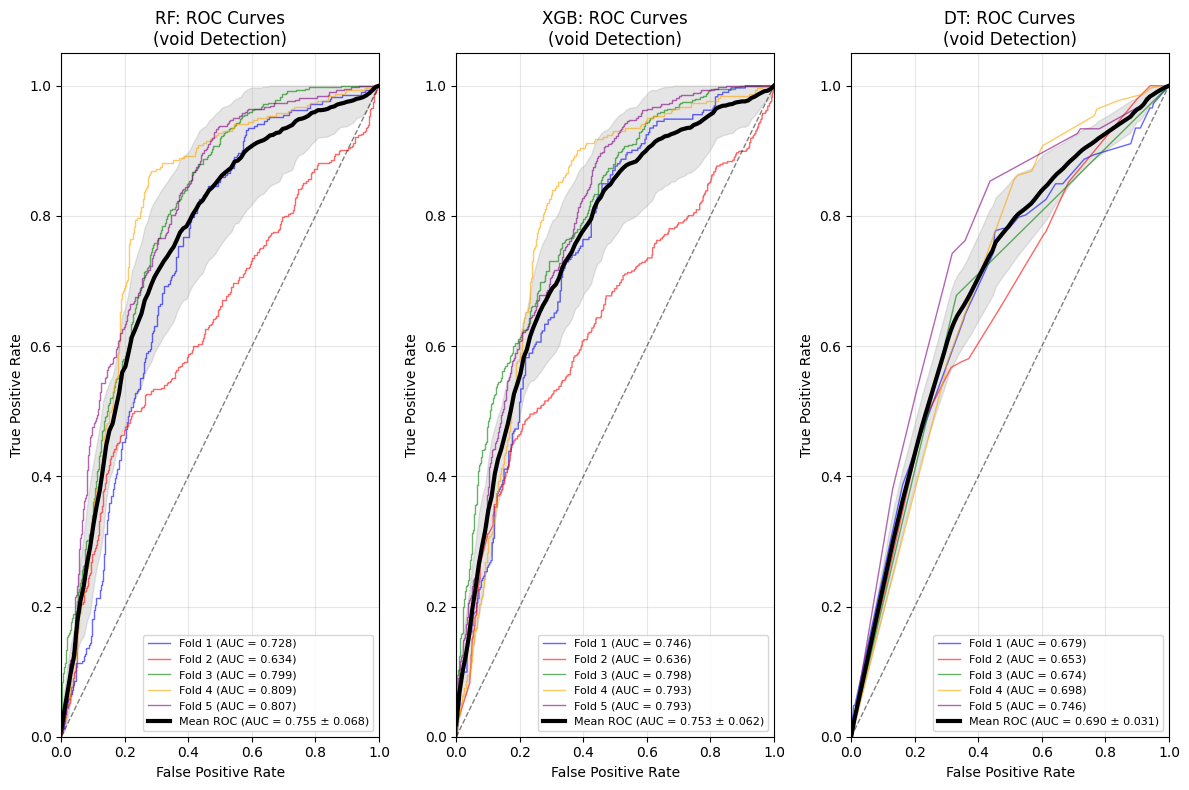

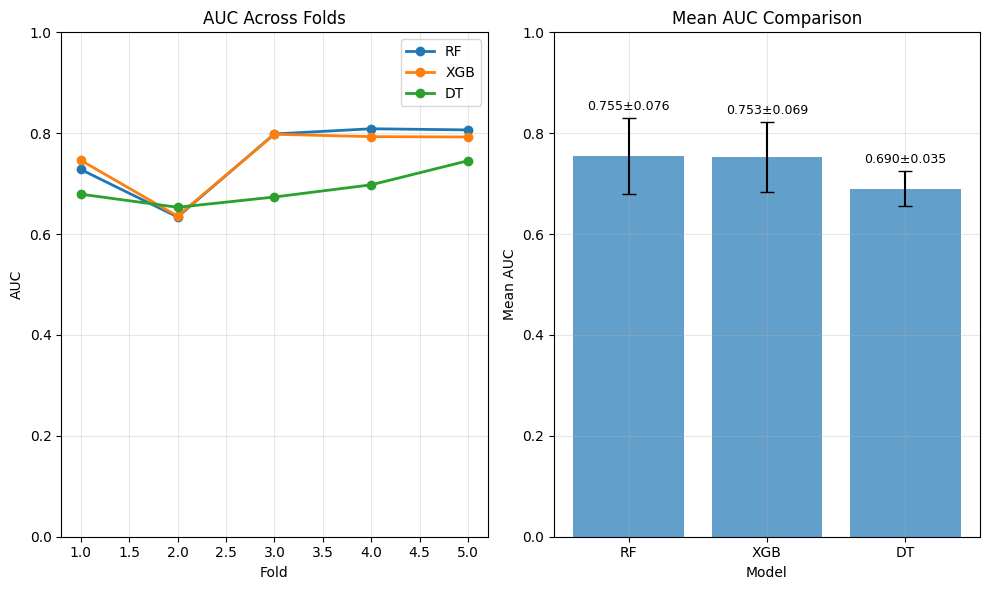

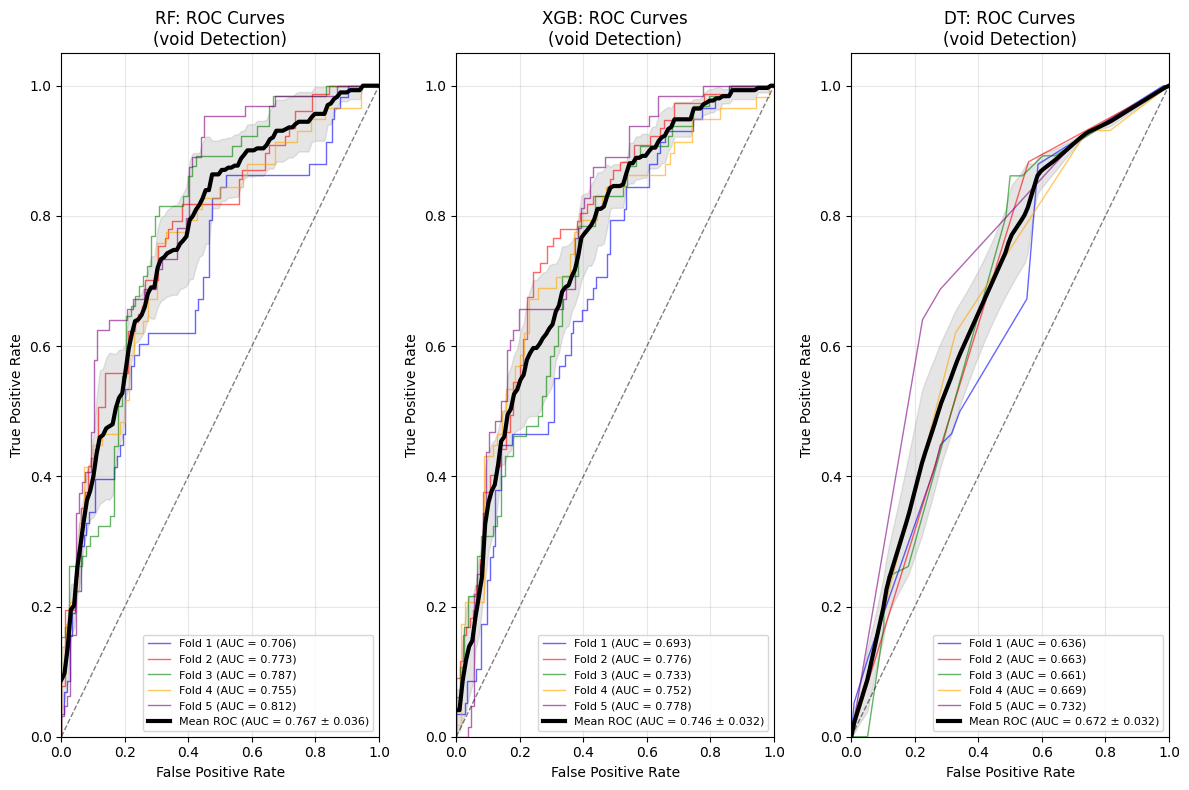

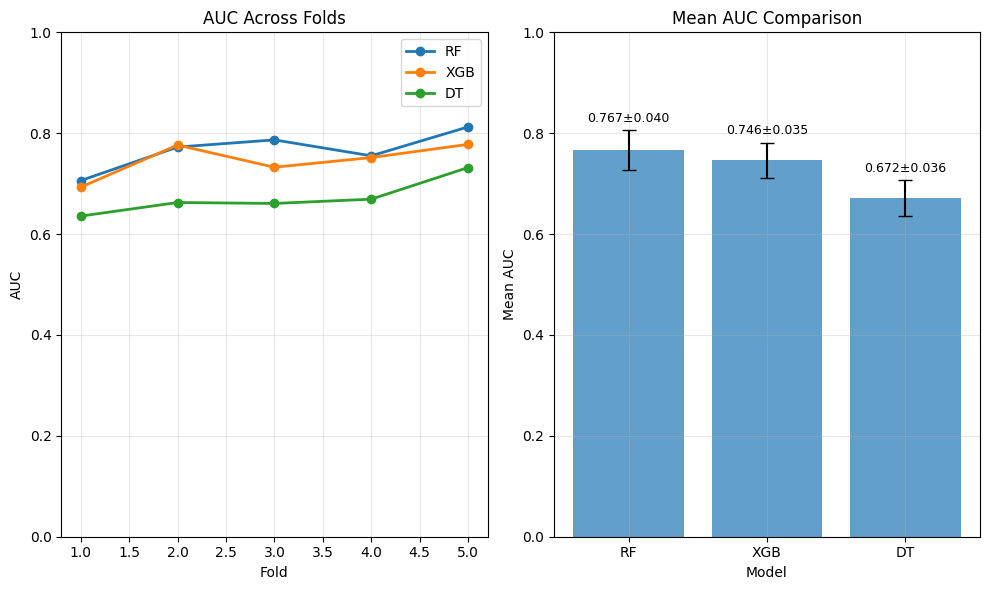

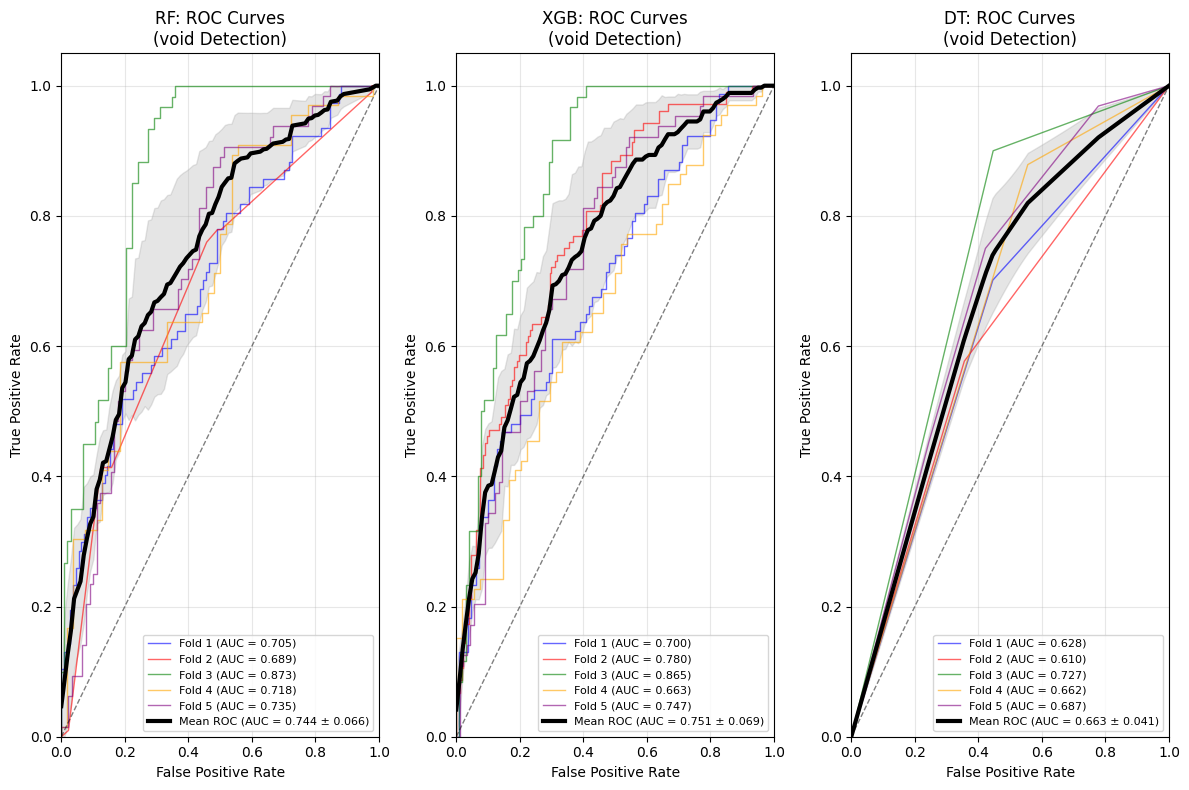

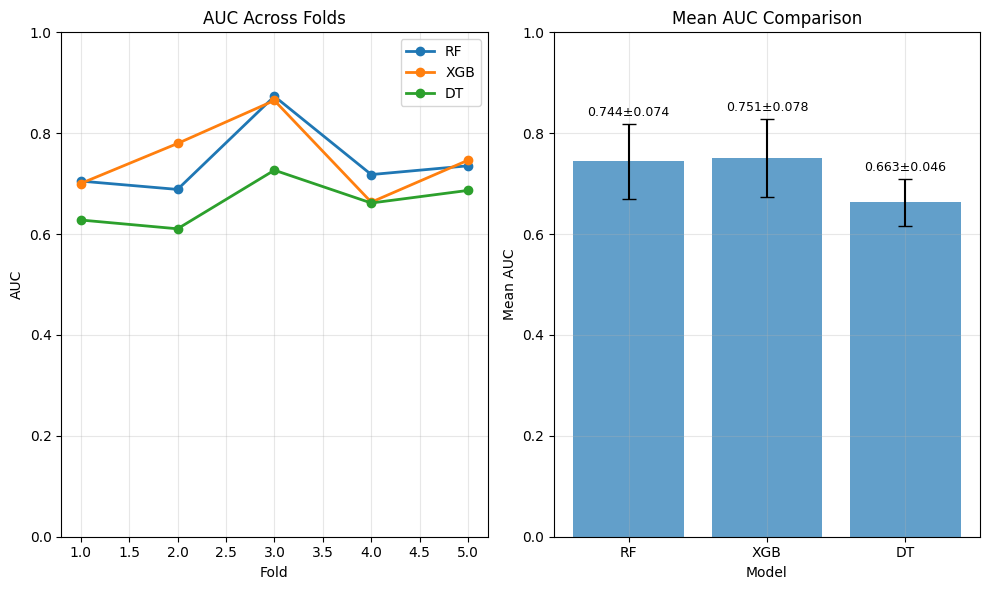

In [8]:
all_results = {}
for file in files:
    data_path = os.path.join(base_path, file)
    features = pd.read_csv(data_path)
    features.drop(columns=['center_time', 'start_time', 'end_time'], inplace=True)
    details = file.split('_')
    exp_name = f"{details[3]}_{details[-1].replace('.csv', '')}"
    print(f"Nested cross-validation for {exp_name}")
    
    X = features.drop(columns=['label', 'experiment_id'])
    y = features['label']
    groups = features['experiment_id']
    
    results_df = nested_cv(X, y, groups, exp_name)

    # Save to csv
    results_df.to_csv(f'/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/subject_based_norm_nested_cv/two_class/preprocessed/feature_set_2/nested_cv/none/with_gravity/metrics/all_metrics_nested_cv_{exp_name}_zwei.csv')

